# Data Import & Summary Statistics

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


healthcaredf = pd.read_csv("/kaggle/input/healthcare-dataset/healthcare_dataset.csv")

healthcaredf.info()

healthcaredf.head()


/kaggle/input/healthcare-dataset/healthcare_dataset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dt

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [2]:
healthcaredf.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


****15 columns, 55,000 rows. The names are lowercase and uppercase randomly, and the billing amount has more than two digits, even though it should have two decimals for cents. Address here:****

In [3]:
healthcaredf["Billing Amount"].sum()

1417432043.3952546

1,417,432,043.3952546 is the current sum of the billing amount before rounding each row to two decimals; this number should not change by much after rounding.


In [4]:
healthcaredf["Billing Amount"] = healthcaredf["Billing Amount"].round(2)
healthcaredf['Name'] = healthcaredf['Name'].str.title()

print(healthcaredf[['Name', 'Billing Amount']])

                    Name  Billing Amount
0          Bobby Jackson        18856.28
1           Leslie Terry        33643.33
2            Danny Smith        27955.10
3           Andrew Watts        37909.78
4          Adrienne Bell        14238.32
...                  ...             ...
55495  Elizabeth Jackson         2650.71
55496         Kyle Perez        31457.80
55497       Heather Wang        27620.76
55498     Jennifer Jones        32451.09
55499       James Garcia         4010.13

[55500 rows x 2 columns]


In [5]:
healthcaredf["Billing Amount"].sum()

1417432041.95

1,417,432,041.95 is the new sum, from 1,417,432,043.39. Only $ 1.44 difference from rounding

In [6]:
round(1417432041.95 - 1417432043.3952546,4)

-1.4453

****Filter for duplicated rows, and drop them.****

In [7]:
#outputs count of duplicate rows. (only counts one for each duplicate)
print('Number of Duplicates')
print(healthcaredf.duplicated().sum())

#filter for duplicates (number of rows is all the duplicates total and the original)
healthcaredf[healthcaredf.duplicated(keep=False)].sort_values('Name')


Number of Duplicates
534


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
42407,Abigail Young,41,Female,O+,Hypertension,2022-12-15,Edward Kramer,Moore-Mcdaniel,UnitedHealthcare,1983.57,192,Elective,2023-01-13,Ibuprofen,Normal
54285,Abigail Young,41,Female,O+,Hypertension,2022-12-15,Edward Kramer,Moore-Mcdaniel,UnitedHealthcare,1983.57,192,Elective,2023-01-13,Ibuprofen,Normal
40385,Adam Thomas,75,Male,O+,Hypertension,2022-01-02,Beverly Miller,Sanchez-Wilson,Cigna,16294.91,180,Urgent,2022-01-30,Ibuprofen,Normal
53139,Adam Thomas,75,Male,O+,Hypertension,2022-01-02,Beverly Miller,Sanchez-Wilson,Cigna,16294.91,180,Urgent,2022-01-30,Ibuprofen,Normal
55298,Alex Black,51,Male,O+,Diabetes,2022-03-27,Frank Williams,Short and Sons,Aetna,39525.67,246,Emergency,2022-04-21,Aspirin,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24049,Willie Small,67,Female,A+,Arthritis,2023-07-25,Susan Gordon,Stone-West,Aetna,29898.35,451,Emergency,2023-08-04,Penicillin,Abnormal
51964,Zachary Ball,85,Female,B-,Diabetes,2020-04-25,Matthew Conley,"and Morgan Jones, Matthews",Blue Cross,15207.55,202,Emergency,2020-05-25,Penicillin,Inconclusive
6345,Zachary Ball,85,Female,B-,Diabetes,2020-04-25,Matthew Conley,"and Morgan Jones, Matthews",Blue Cross,15207.55,202,Emergency,2020-05-25,Penicillin,Inconclusive
55045,Zoe Rodriguez,53,Female,O+,Cancer,2024-03-22,David Keller,Jones Ltd,Medicare,9024.09,178,Elective,2024-04-08,Penicillin,Inconclusive


In [8]:
#drop duplicates

healthcaredf=healthcaredf.drop_duplicates()
print(len(healthcaredf))

54966


In [9]:
total=healthcaredf["Billing Amount"].sum()
print(f"{total:,.0f}")

1,404,068,338


In [10]:
# Check if any values in Billing Amount contain parentheses (negatives)
has_parentheses = healthcaredf['Billing Amount'].astype(str).str.contains(r'\(.*\)')


# Count how many rows have parentheses
print(has_parentheses.sum())

# Optionally, view only the rows that have parentheses
print(healthcaredf[has_parentheses])


0
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []


In [11]:
#check if there are negative numbers in billing amount
negatives=healthcaredf[healthcaredf['Billing Amount']<0]
print(negatives[['Name','Billing Amount']])

#check length of negative billing amounts

len(negatives)

                           Name  Billing Amount
132             Ashley Erickson         -502.51
799           Christopher Weiss        -1018.25
1018              Ashley Warner         -306.36
1421               Jay Galloway         -109.10
2103          Joshua Williamson         -576.73
...                         ...             ...
52213  Mr. Christopher Alvarado        -1310.27
52629          Gabrielle Decker         -676.85
53204             Ashley Warner         -306.36
53232              Daniel Drake         -591.92
54136         Dr. Michael Mckay         -199.66

[106 rows x 2 columns]


106

108 rows are negative billing amount, Probably meaning:
1. Refunds or Returns: The hospital might have refunded part of the bill to the patient or insurance company. 
2. Billing Corrections: Errors in previous bills (overcharges) that were corrected later, recorded as negative amounts.
3. Insurance Adjustments: Insurance claims might have reduced the original billed amount, resulting in negative values in your dataset.
4. Data Entry Errors: Sometimes negative values are accidental or misformatted entries, especially if parentheses were used to indicate negatives in the original Excel file.

****Checking value counts of object datatypes to look for objects that have either very few unique values or less than 555 unique values. In this output the unique values are the number of rows ("Length"), so I am looking for any column that has less than 555 as length to decide if it should be a category (If they have less than 1 percent of the total rows (0.01 * 55,500 = 555 rows)****

In [12]:
categorical_cols=healthcaredf.select_dtypes('object')
for i in categorical_cols:
    print(f"\nUnique Values of {i}")
    print(healthcaredf[i].value_counts())


Unique Values of Name
Name
Michael Williams    24
Michael Smith       23
Robert Smith        21
James Brown         19
James Smith         18
                    ..
David Black          1
Jeffrey Phillips     1
Andre Vasquez        1
Anna Cardenas        1
Terry Chavez         1
Name: count, Length: 40235, dtype: int64

Unique Values of Gender
Gender
Male      27496
Female    27470
Name: count, dtype: int64

Unique Values of Blood Type
Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64

Unique Values of Medical Condition
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

Unique Values of Date of Admission
Date of Admission
2024-03-16    50
2020-10-22    49
2021-12-28    48
2023-08-10    47
2022-07-24    47
              ..
2022-05-28    14
2023-04-12    14
2022-05-23    13
2019-07-22   

**So the ones that should be converted to categories are: Gender, Blood Type, Medical Condition, Insurance Provider, Admission Type, Medication, and Test Results. Discharge date and date of admission should be converted to date time data type.**

In [13]:
# Convert dates
healthcaredf["Date of Admission"] = pd.to_datetime(healthcaredf["Date of Admission"], errors='coerce')
healthcaredf["Discharge Date"] = pd.to_datetime(healthcaredf["Discharge Date"], errors='coerce')


In [14]:
categorical_cols = [
    "Gender", "Blood Type", "Medical Condition",
    "Insurance Provider", "Admission Type", "Medication", "Test Results"]
healthcaredf[categorical_cols] = healthcaredf[categorical_cols].astype("category")
# Check result
healthcaredf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  category      
 3   Blood Type          54966 non-null  category      
 4   Medical Condition   54966 non-null  category      
 5   Date of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance Provider  54966 non-null  category      
 9   Billing Amount      54966 non-null  float64       
 10  Room Number         54966 non-null  int64         
 11  Admission Type      54966 non-null  category      
 12  Discharge Date      54966 non-null  datetime64[ns]
 13  Medication          54966 non-null  category      


# Assessing Ages in data

In [15]:
healthcaredf['Age'].describe()

count    54966.000000
mean        51.535185
std         19.605661
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64

In [16]:
healthcaredf['Age'].mode()

0    38
Name: Age, dtype: int64

In [17]:
len(healthcaredf[healthcaredf['Age'] == 38])

890

**Minimum age is 13, max is 89, most common age is 38, which appeared 897 times.
Adding a new column that labels the age group of the patient.**

In [18]:
bn=[10,18,25,65,90]
label=['Teens(10-17)','Young Adults(18-24)','Adults(25-64)','Seniors(>65)']
healthcaredf['Age Group']=pd.cut(healthcaredf['Age'],bins=bn,labels=label,right=False)

healthcaredf[['Age Group','Age']]

healthcaredf['Age Group'].value_counts()


Age Group
Adults(25-64)          32383
Seniors(>65)           16923
Young Adults(18-24)     5544
Teens(10-17)             116
Name: count, dtype: int64

**Box plot of age groups by number of patients in the dataset.**

In [19]:
age_counts = healthcaredf['Age Group'].value_counts().sort_index()
age_counts


Age Group
Teens(10-17)             116
Young Adults(18-24)     5544
Adults(25-64)          32383
Seniors(>65)           16923
Name: count, dtype: int64

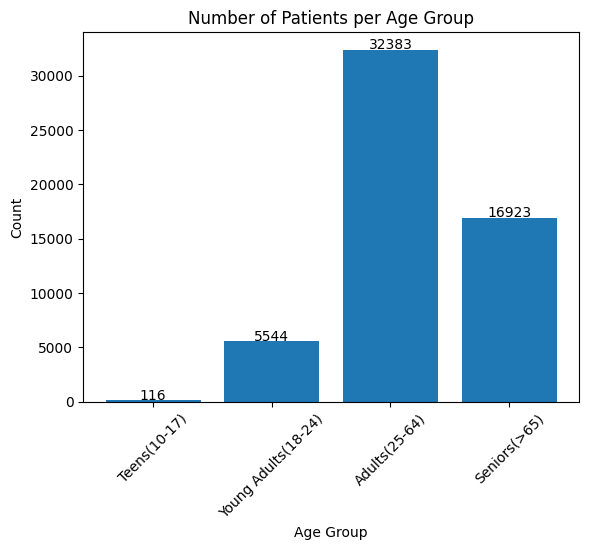

In [20]:
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Number of Patients per Age Group')
plt.xticks(rotation=45)  # rotate labels if needed
for i, v in enumerate(age_counts.values):
    plt.text(i, v + 50, str(v), ha='center', fontsize=10)  # adds count above bar
plt.show()

****How many Hospitals are there in the data set? (39,876) How many hospitals show up more than 10 times in the data set? (162)****

In [21]:
healthcaredf['Hospital'].value_counts()


Hospital
LLC Smith                       44
Ltd Smith                       39
Johnson PLC                     37
Smith Ltd                       37
Smith Group                     36
                                ..
PLC Navarro                      1
PLC Mcintosh                     1
and Hernandez, Hughes Walton     1
Myers-Williams                   1
Moreno Murphy, Griffith and      1
Name: count, Length: 39876, dtype: int64

In [22]:
print(healthcaredf['Hospital'].value_counts()[healthcaredf['Hospital'].value_counts() > 10])

Hospital
LLC Smith         44
Ltd Smith         39
Johnson PLC       37
Smith Ltd         37
Smith Group       36
                  ..
Sons Smith and    11
Ltd Anderson      11
LLC Taylor        11
Phillips LLC      11
James Ltd         11
Name: count, Length: 162, dtype: int64


****How many unique medical conditions are there in the dataset? (6) How many hospitals contain data with all six medical conditions? (106 hospitals)****

In [23]:
print(healthcaredf['Medical Condition'].unique())

#Filter for hospitals with all 6 medical conditions treated in their data: 

hospitals_num_condition = (healthcaredf.groupby('Hospital')['Medical Condition'].nunique().reset_index())

hospitals_with_all6 = hospitals_num_condition[hospitals_num_condition['Medical Condition'] == 6]

print(hospitals_with_all6)


['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension', 'Arthritis']
Categories (6, object): ['Arthritis', 'Asthma', 'Cancer', 'Diabetes', 'Hypertension', 'Obesity']
                Hospital  Medical Condition
559       Anderson Group                  6
564         Anderson Inc                  6
571         Anderson LLC                  6
581         Anderson PLC                  6
2908         Brown Group                  6
...                  ...                ...
33774       Williams Ltd                  6
33790       Williams PLC                  6
34198       Wilson Group                  6
34877          Young Ltd                  6
39134  and Sons Williams                  6

[106 rows x 2 columns]


****How many rows of data are there for those 106 hospitals that have treated those 6 medical conditions at least once? (1,807 rows)****

In [24]:
mask6=hospitals_with_all6['Hospital']


#only 106 hospitals have all 6 medical conditions in their data set. How many rows of data are those hospitals in the original data?
#/ filter original data for just those

thosewith6=healthcaredf[healthcaredf['Hospital'].isin(mask6)]

print(thosewith6[['Name','Hospital','Medical Condition']].sort_values(by='Hospital'))


                  Name           Hospital Medical Condition
33136    William Green     Anderson Group            Cancer
38957      Derek Payne     Anderson Group         Arthritis
11001     Faith Mathis     Anderson Group         Arthritis
8532        David Kerr     Anderson Group      Hypertension
53120     Faith Mathis     Anderson Group         Arthritis
...                ...                ...               ...
35739   Matthew Garcia  and Sons Williams           Obesity
39341   Albert Freeman  and Sons Williams         Arthritis
33532     Sarah Brooks  and Sons Williams            Asthma
22468    Donald Foster  and Sons Williams           Obesity
29913  Christine Jones  and Sons Williams           Obesity

[1807 rows x 3 columns]


****Find the top 10 hospitals with the highest average billing, but only for the hospitals that have treated all 6 medical conditions****

Index(['Inc Anderson', 'Garcia PLC', 'Ltd Davis', 'Group Cook', 'Inc Brown',
       'Inc Jones', 'Ramirez Group', 'King Ltd', 'Miller Inc', 'LLC Wilson'],
      dtype='object', name='Hospital')
Medical Condition     Arthritis      Asthma        Cancer   Diabetes  \
Hospital                                                               
Inc Anderson       32643.906667  36640.3300  36463.195000  45396.540   
Garcia PLC         43494.190000  28949.7400  35899.455000  40319.945   
Ramirez Group      48709.260000  28172.8400  30339.660000  34453.480   
Ltd Davis          34410.590000  33979.2450  22693.050000  47601.780   
Miller Inc         42020.940000  37376.4900  34194.576667  28629.585   
Inc Brown          26475.851667  38395.3175  29828.626667  33900.670   
Group Cook         33523.470000  42121.4350  19551.830000  34867.790   
King Ltd           32698.270000  11407.3450  41492.613333   9043.850   
LLC Wilson         28272.115000  41382.8150  48206.500000  13106.840   
Inc Jones     

/tmp/ipykernel_13/3740127763.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered.groupby(['Hospital', 'Medical Condition'])['Billing Amount']


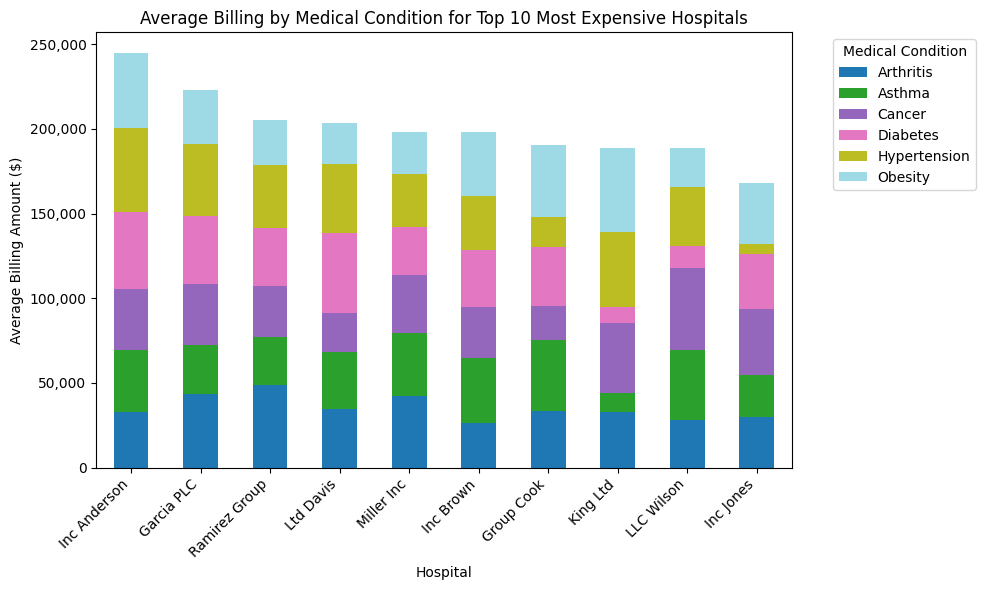

In [25]:
#A. find top 10 hospitals by average billing overall of only the hospitals that have treated all 6 medical conditions

top10_hospitals = (thosewith6.groupby(['Hospital'])['Billing Amount'].mean()
    .sort_values(ascending=False)
    .head(10).index)

print(top10_hospitals)

#B. Filter data to only those hospitals 
filtered = healthcaredf[healthcaredf['Hospital'].isin(top10_hospitals)]



# C. Group by Hospital and Medical Condition to get average billing
avg_billing = (
    filtered.groupby(['Hospital', 'Medical Condition'])['Billing Amount']
    .mean()
    .reset_index())

# D. Pivot so Medical Conditions become columns for stacked bars
pivot_df = avg_billing.pivot(index='Hospital', columns='Medical Condition', values='Billing Amount')


# **Sort hospitals by total average billing**
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]


print(pivot_df)
# E. Create the stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')

plt.title('Average Billing by Medical Condition for Top 10 Most Expensive Hospitals')
plt.ylabel('Average Billing Amount ($)')
plt.xlabel('Hospital')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Average billing amount by medical condition (Bar plot)

In [26]:
healthcaredf['Billing Amount'].sum()

1404068337.89

Medical Condition
Obesity         25804.36
Diabetes        25660.48
Asthma          25633.46
Arthritis       25511.78
Hypertension    25503.06
Cancer          25152.32
Name: Billing Amount, dtype: float64


/tmp/ipykernel_13/3485088754.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_billing_by_condition = (healthcaredf.groupby("Medical Condition")["Billing Amount"].mean().sort_values(ascending=False).round(2))
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


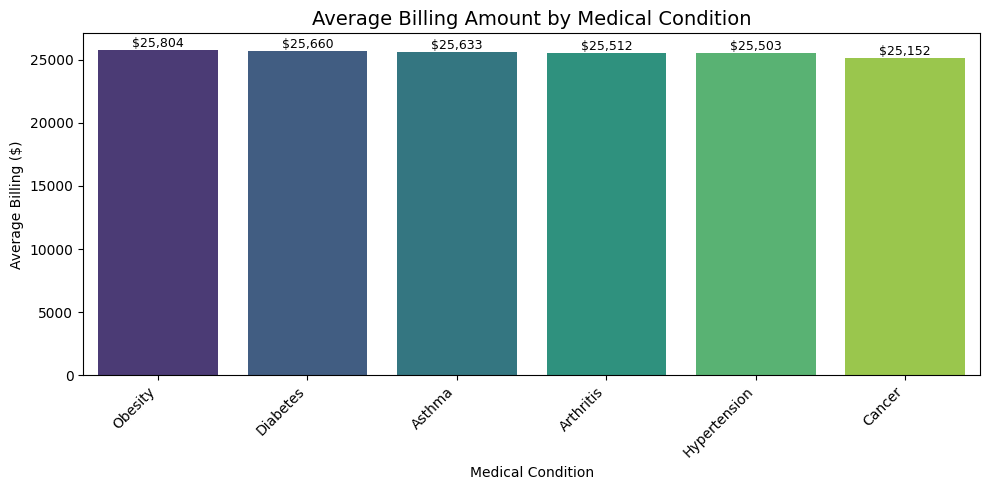

In [27]:
avg_billing_by_condition = (healthcaredf.groupby("Medical Condition")["Billing Amount"].mean().sort_values(ascending=False).round(2))


print(avg_billing_by_condition)

#Bar plot

plt.figure(figsize=(10,5))
ax = sns.barplot(
    x=avg_billing_by_condition.index,
    y=avg_billing_by_condition.values,
    order=avg_billing_by_condition.index,  # ensures correct sort order
    palette="viridis"
)
# Add value labels on top of bars
for i, v in enumerate(avg_billing_by_condition.values):
    ax.text(i, v, f"${v:,.0f}", ha='center', va='bottom', fontsize=9) #adds dollar sign and rounds the bar label to nearest whole number (dollar)
# Labels and formatting
plt.title("Average Billing Amount by Medical Condition", fontsize=14)
plt.xlabel("Medical Condition")
plt.ylabel("Average Billing ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Test if admission types have significantly different billing amounts.

In [28]:
from scipy.stats import f_oneway

emergency = healthcaredf.loc[healthcaredf["Admission Type"]=="Emergency", "Billing Amount"]

urgent = healthcaredf.loc[healthcaredf["Admission Type"]=="Urgent", "Billing Amount"]
elective = healthcaredf.loc[healthcaredf["Admission Type"]=="Elective", "Billing Amount"]

f_stat, p_val = f_oneway(emergency, urgent, elective)
print(f"ANOVA p-value: {p_val:.5f}")

ANOVA p-value: 0.72688


If p_value is less than 0.05: Reject H₀ → Meaning there is a statistically significant difference in billing amounts between at least two admission types. If the p-value is more than 0.05, fail to reject Ho, therefore, there is no difference in average billing amounts between admission types.
Since the p-value is greater than 0.05, there is no significant difference in average billing amounts by admission type.


# Average Length of stay by admission type (bar plot)

Admission Type
Emergency    15.584134
Elective     15.511178
Urgent       15.403839
Name: Length of Stay (days), dtype: float64


/tmp/ipykernel_13/9396910.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  healthcaredf.groupby("Admission Type")["Length of Stay (days)"].mean().sort_values(ascending=False)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


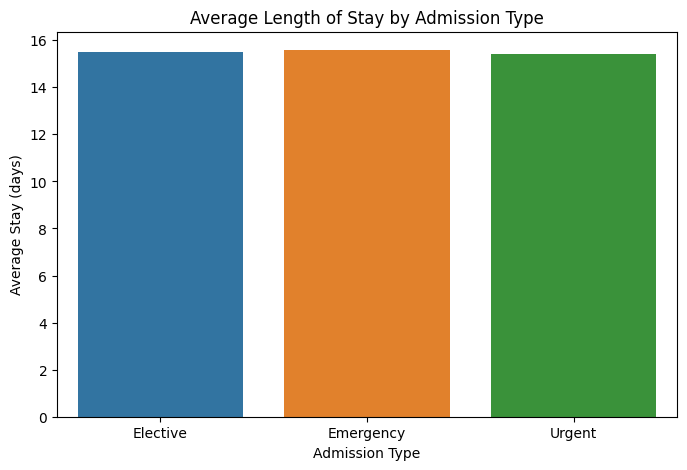

In [29]:

# Calculate stay duration (in days)
healthcaredf["Length of Stay (days)"] = (
    (healthcaredf["Discharge Date"] - healthcaredf["Date of Admission"]).dt.days
)


avg_stay_by_admission = (
    healthcaredf.groupby("Admission Type")["Length of Stay (days)"].mean().sort_values(ascending=False)
)
print(avg_stay_by_admission)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_stay_by_admission.index, y=avg_stay_by_admission.values)
plt.title("Average Length of Stay by Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Average Stay (days)")
plt.show()


# Average Length of Stay by Medical Condition

In [30]:

avg_stay_by_medicalondition = (
    healthcaredf.groupby("Medical Condition")["Length of Stay (days)"].mean().sort_values(ascending=False)
)


print(avg_stay_by_medicalondition)



Medical Condition
Asthma          15.677295
Arthritis       15.504231
Cancer          15.501204
Obesity         15.447627
Hypertension    15.436236
Diabetes        15.430664
Name: Length of Stay (days), dtype: float64


/tmp/ipykernel_13/4178009552.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  healthcaredf.groupby("Medical Condition")["Length of Stay (days)"].mean().sort_values(ascending=False)


# Which medical conditions have the highest average count of abnormal test results? (Bar plot)

/tmp/ipykernel_13/2769810716.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Medical Condition")["Name"]
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Medical Condition
Arthritis       3156
Diabetes        3131
Obesity         3104
Cancer          3089
Asthma          2980
Hypertension    2977
Name: Name, dtype: int64


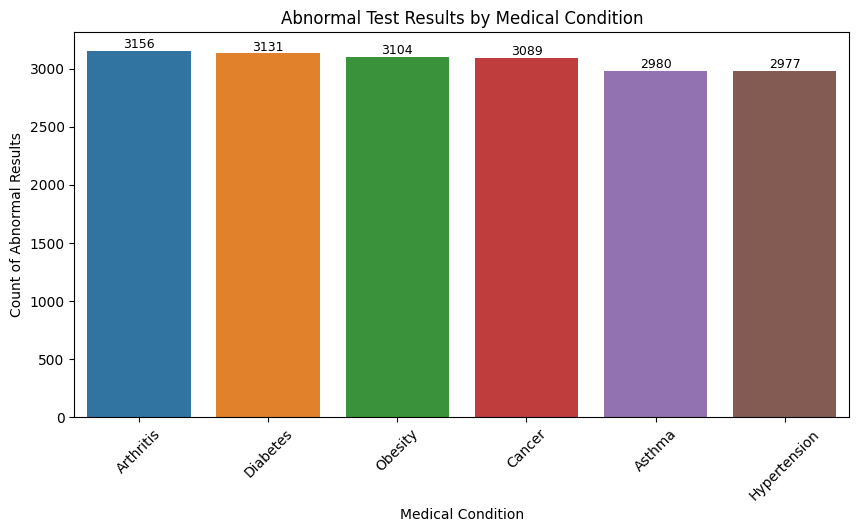

In [31]:
abnormal_counts = (
    healthcaredf[healthcaredf["Test Results"] == "Abnormal"]
    .groupby("Medical Condition")["Name"]
    .count()
    .sort_values(ascending=False)
)
print(abnormal_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=abnormal_counts.index, y=abnormal_counts.values,order=abnormal_counts.index )
for i, v in enumerate(abnormal_counts.values):
    plt.text(i, v, f"{v:.0f}", ha='center', va='bottom', fontsize=9)
plt.title("Abnormal Test Results by Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Count of Abnormal Results")
plt.xticks(rotation=45)
plt.show()

# Billing amount distribution by insurance provider (boxplot)

Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


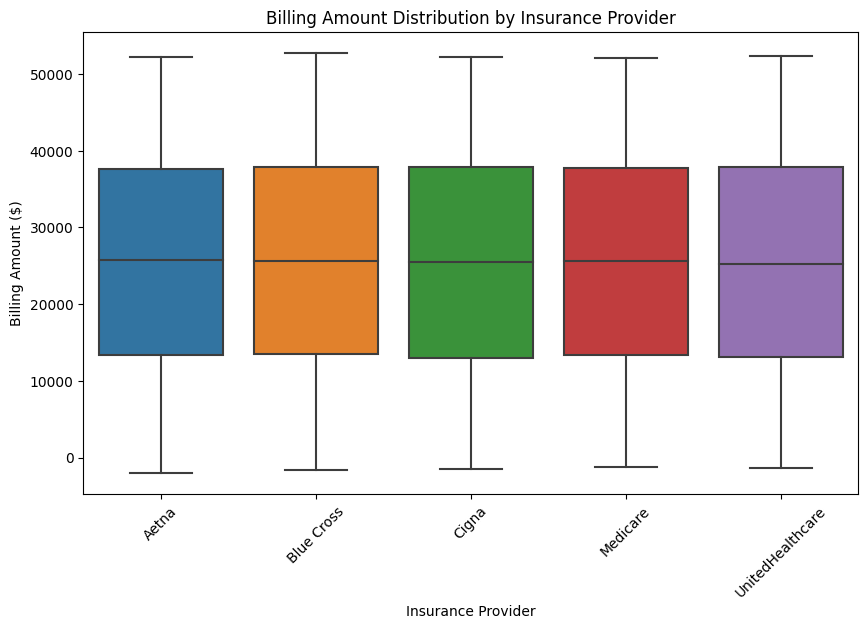

Billing Amounts on Average by
Insurance Provider
Aetna               25549.689590
Blue Cross          25603.460604
Cigna               25525.998664
Medicare            25628.320168
UnitedHealthcare    25414.506188
Name: Billing Amount, dtype: float64


/tmp/ipykernel_13/2535220754.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = healthcaredf.groupby("Insurance Provider")["Billing Amount"].mean()


In [32]:
#value counts of insurance provider instances

print(healthcaredf['Insurance Provider'].value_counts())

#there are no missing values ("na" insurance) if there were then I'd use this:
#healthcaredf['Insurance Provider'].value_counts(dropna=False)


plt.figure(figsize=(10,6))
sns.boxplot(data=healthcaredf, x="Insurance Provider", y="Billing Amount")
plt.title("Billing Amount Distribution by Insurance Provider")
plt.xlabel("Insurance Provider")
plt.ylabel("Billing Amount ($)")
plt.xticks(rotation=45)
plt.show()



agg_df = healthcaredf.groupby("Insurance Provider")["Billing Amount"].mean()
print("Billing Amounts on Average by")
print(agg_df)

# Relationship between age and billing amount by gender (categorical scatter plot)

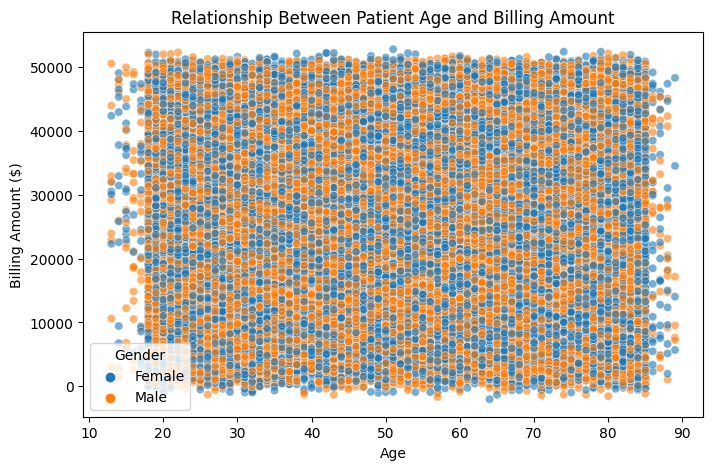

Correlation between Age and Billing Amount: -0.003
r = -0.003, p = 0.422


In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=healthcaredf, x="Age", y="Billing Amount", hue="Gender", alpha=0.6)
plt.title("Relationship Between Patient Age and Billing Amount")
plt.xlabel("Age")
plt.ylabel("Billing Amount ($)")
plt.show()

# Correlation
correlation = healthcaredf["Age"].corr(healthcaredf["Billing Amount"])
print(f"Correlation between Age and Billing Amount: {correlation:.3f}")

from scipy.stats import pearsonr

r, p_value = pearsonr(healthcaredf["Age"], healthcaredf["Billing Amount"])

print(f"r = {r:.3f}, p = {p_value:.3f}")

#If the p_value > 0.05 then it is not a statistically significant relationship.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


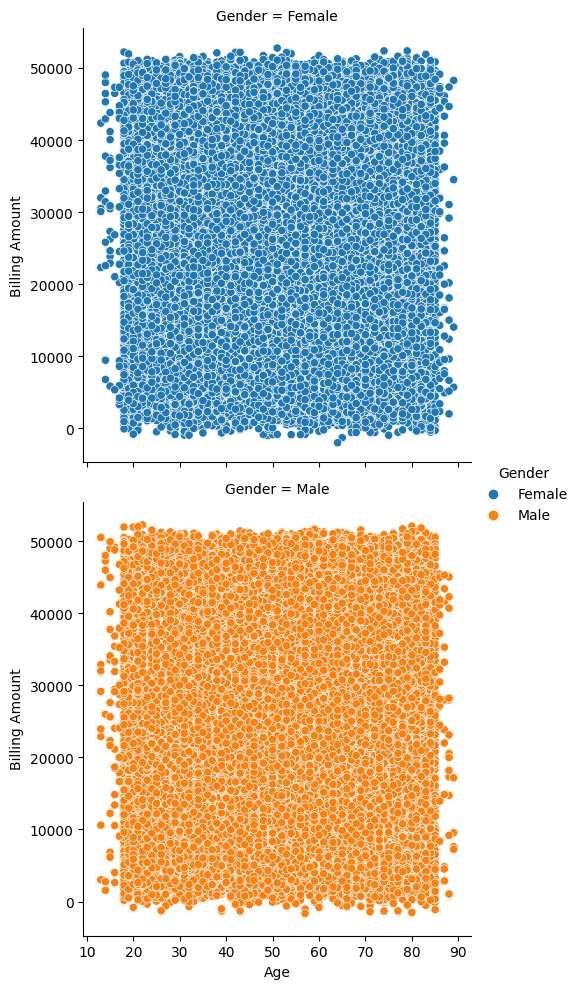

In [34]:
sns.relplot(x='Age',y='Billing Amount', data=healthcaredf, kind='scatter',row='Gender',hue='Gender')


In [35]:
# Correlation
correlation = healthcaredf["Age"].corr(healthcaredf["Billing Amount"])
print(f"Correlation between Age and Billing Amount: {correlation:.3f}")

from scipy.stats import pearsonr

r, p_value = pearsonr(healthcaredf["Age"], healthcaredf["Billing Amount"])

print(f"r = {r:.3f}, p = {p_value:.3f}")

#If the p_value > 0.05 then it is not a statistically significant relationship.

Correlation between Age and Billing Amount: -0.003
r = -0.003, p = 0.422


Age and billing amount do not have a significant correlation.

# ****For loop that iterates on cols. Highest 'Features' according to the average number of days hospitalized. (outputs HTML links):****

In [36]:
healthcaredf['Days hospitalized']=healthcaredf['Length of Stay (days)']

cols = ['Hospital','Gender','Blood Type','Medical Condition',
        'Insurance Provider','Admission Type',
        'Medication','Test Results']


In [37]:
import plotly.graph_objects as go
import plotly.io as pio

from IPython.display import display, FileLink


for i in cols:
    if i == 'Hospital':
        char_bar = (
            healthcaredf.groupby('Hospital')[['Days hospitalized']]
            .mean()
            .reset_index()
            .sort_values(by="Days hospitalized", ascending=False)
        )

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top[i], y=top["Days hospitalized"]))

        fig.update_layout(
            title=f'Top 10 {i}s by Average Length of Stay',
            xaxis_title=i,
            yaxis_title="Avg. Days hospitalized",
            plot_bgcolor='black',
            paper_bgcolor='gray',
            font=dict(color='white'))
        # Save as HTML
        filename = f"{i}_avg_days.html"
        fig.write_html(filename)
        # Display a clickable link in the notebook
        display(FileLink(filename))
    else:
        char_bar = (
            healthcaredf.groupby(i)[['Days hospitalized']]
            .mean()
            .reset_index()
            .sort_values(by="Days hospitalized", ascending=False)
        )

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top[i], y=top["Days hospitalized"]))

        fig.update_layout(
            title=f'Average Number of Days Hospitalized Grouped by {i}',
            xaxis_title=i,
            yaxis_title="Avg. Days hospitalized",
            plot_bgcolor='black',
            paper_bgcolor='gray',
            font=dict(color='white'))
        # Save as HTML
        filename = f"{i}_avg_days.html"
        fig.write_html(filename)

        # Display a clickable link in the notebook
        display(FileLink(filename))

/kaggle/working/Hospital_avg_days.html

/tmp/ipykernel_13/2234654196.py:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/kaggle/working/Gender_avg_days.html

/tmp/ipykernel_13/2234654196.py:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/kaggle/working/Blood Type_avg_days.html

/tmp/ipykernel_13/2234654196.py:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/kaggle/working/Medical Condition_avg_days.html

/tmp/ipykernel_13/2234654196.py:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/kaggle/working/Insurance Provider_avg_days.html

/tmp/ipykernel_13/2234654196.py:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/kaggle/working/Admission Type_avg_days.html

/tmp/ipykernel_13/2234654196.py:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/kaggle/working/Medication_avg_days.html

/tmp/ipykernel_13/2234654196.py:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/kaggle/working/Test Results_avg_days.html

Click blue html links to view plots ^^

# Bar Plot of Billing Amount Averages per Length of Stay

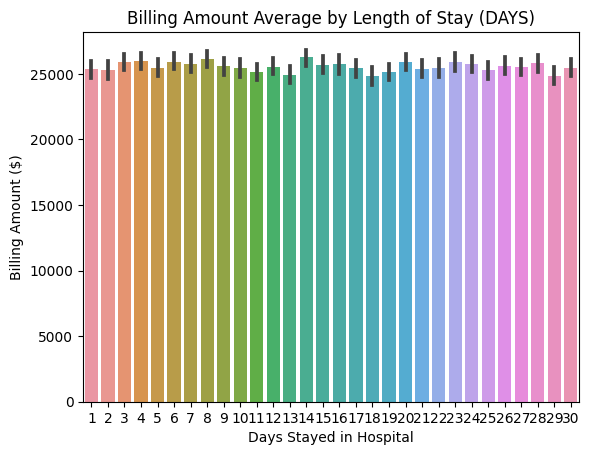

In [38]:
sns.barplot(data=healthcaredf, x="Length of Stay (days)", y="Billing Amount")
plt.title("Billing Amount Average by Length of Stay (DAYS)")
plt.xlabel("Days Stayed in Hospital")
plt.ylabel("Billing Amount ($)")

plt.show()

# Monthly Count of Hospital Patients Trend

     Date of Admission  count
1238        2019-05-08     27
202         2019-05-09     38
1806        2019-05-10     17
1422        2019-05-11     25
410         2019-05-12     35
...                ...    ...
835         2024-05-03     31
1570        2024-05-04     24
1375        2024-05-05     26
602         2024-05-06     33
548         2024-05-07     33

[1827 rows x 2 columns]
   Date of Admission  count
0         2019-05-31    677
1         2019-06-30    899
2         2019-07-31    951
3         2019-08-31    985
4         2019-09-30    924
..               ...    ...
56        2024-01-31    903
57        2024-02-29    869
58        2024-03-31    902
59        2024-04-30    941
60        2024-05-31    212

[61 rows x 2 columns]


/tmp/ipykernel_13/3587524078.py:14: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



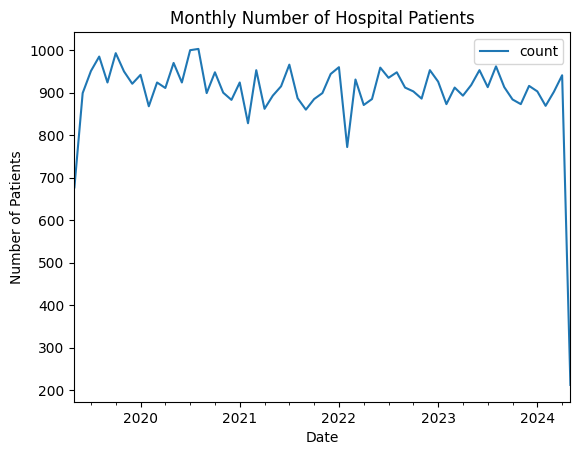

In [39]:

timeseries=healthcaredf[['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Age Group', 'Length of Stay (days)']].sort_values('Date of Admission').reset_index()

timeseries.head()

countofvisitsperday=timeseries['Date of Admission'].value_counts().reset_index().sort_values(by='Date of Admission')

print(countofvisitsperday)

import matplotlib.dates as mdates

monthlysum= countofvisitsperday.resample('M',on='Date of Admission').sum().reset_index()

print(monthlysum)
monthlysum.plot(x='Date of Admission',y='count', kind='line')
plt.xlabel('Date')
plt.ylabel("Number of Patients")
plt.title('Monthly Number of Hospital Patients')
plt.show()

# Billing Sum Per Month Trend

/tmp/ipykernel_13/2705156466.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



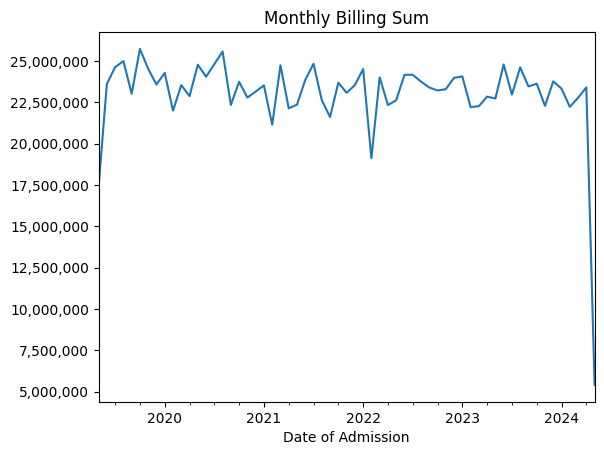

In [40]:
#billing sum per month
billing_sum_per_month = healthcaredf.resample('M', on='Date of Admission')['Billing Amount'].sum()

billing_sum_per_month

billing_sum_per_month.plot(title='Monthly Billing Sum')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

# Count of Monthly Patients Per Admission Type (Trend)

In [41]:
df = healthcaredf.copy()
monthly_admissions = df.resample('M', on='Date of Admission')['Admission Type'].value_counts().unstack(fill_value=0)
print(monthly_admissions)

Admission Type     Elective  Emergency  Urgent
Date of Admission                             
2019-05-31              238        224     215
2019-06-30              320        270     309
2019-07-31              324        307     320
2019-08-31              324        302     359
2019-09-30              293        296     335
...                     ...        ...     ...
2024-01-31              300        288     315
2024-02-29              314        306     249
2024-03-31              282        289     331
2024-04-30              313        331     297
2024-05-31               77         64      71

[61 rows x 3 columns]


/tmp/ipykernel_13/1597712277.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



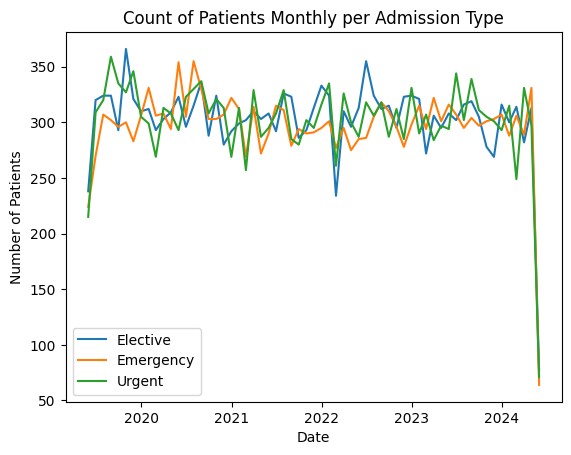

In [42]:
plt.plot(monthly_admissions.index,  monthly_admissions['Elective'], label='Elective')
plt.plot(monthly_admissions.index,monthly_admissions['Emergency'], label='Emergency')
plt.plot(monthly_admissions.index,monthly_admissions['Urgent'], label='Urgent')
plt.title("Count of Patients Monthly per Admission Type")
plt.xlabel("Date")
plt.ylabel("Number of Patients")
plt.legend()
plt.show()

# Monthly Patients per Medical Condition (Trends)

In [43]:
monthly_diseases=df.resample('M', on='Date of Admission')['Medical Condition'].value_counts().unstack(fill_value=0)

print(monthly_diseases)

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Date of Admission                                                            
2019-05-31               114     114     116       107           106      120
2019-06-30               137     159     154       161           135      153
2019-07-31               146     152     169       176           151      157
2019-08-31               196     191     159       155           149      135
2019-09-30               145     182     167       139           159      132
...                      ...     ...     ...       ...           ...      ...
2024-01-31               170     162     145       155           127      144
2024-02-29               171     157     138       130           137      136
2024-03-31               141     164     162       157           144      134
2024-04-30               173     159     140       162           154      153
2024-05-31                34      33      33        48          

/tmp/ipykernel_13/3261727033.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



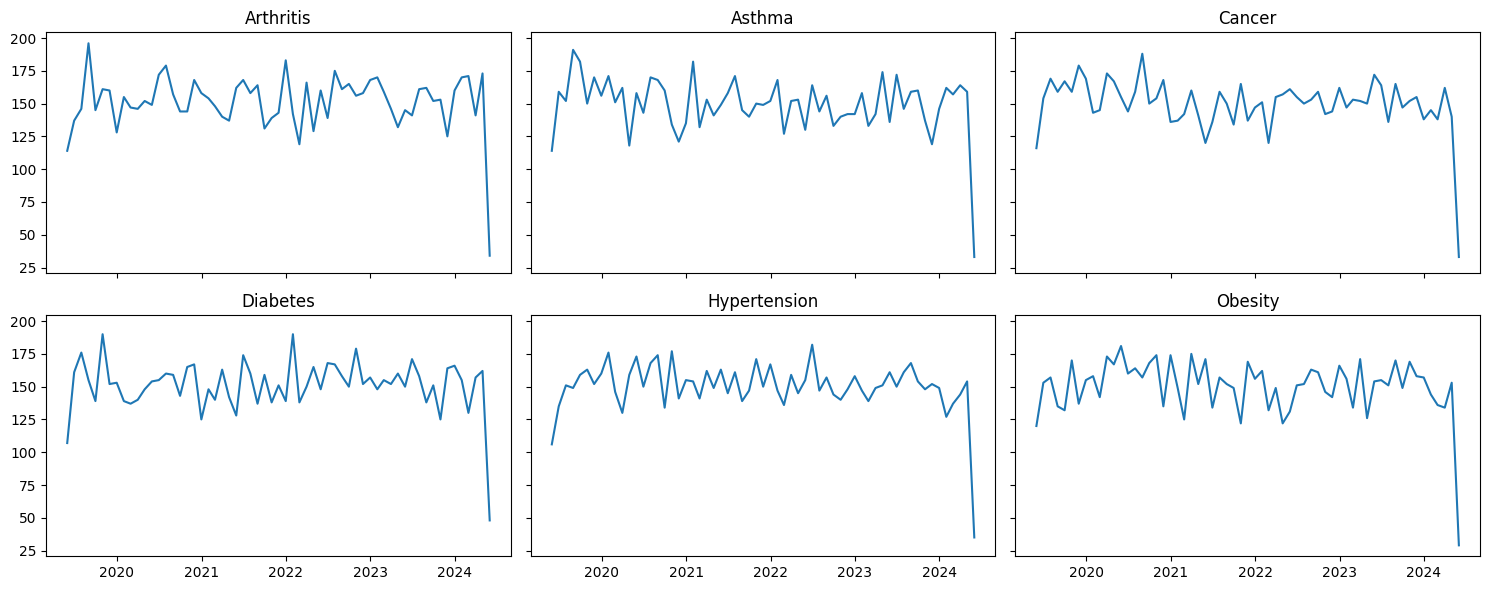

In [44]:
n_cols = 3
n_rows = (len(monthly_diseases.columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3), sharex=True, sharey=True)

for ax, condition in zip(axes.flatten(), monthly_diseases.columns):
    ax.plot(monthly_diseases.index, monthly_diseases[condition])
    ax.set_title(condition)
    
plt.tight_layout()
plt.show()


# Patients per Age Group (Trends)

/tmp/ipykernel_13/3779346429.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Age Group          Teens(10-17)  Young Adults(18-24)  Adults(25-64)  \
Date of Admission                                                     
2019-05-31                    0                   67            398   
2019-06-30                    4                   80            525   
2019-07-31                    4                  102            539   
2019-08-31                    1                   88            594   
2019-09-30                    2                  131            510   
...                         ...                  ...            ...   
2024-01-31                    2                   85            529   
2024-02-29                    1                   99            503   
2024-03-31                    0                  108            521   
2024-04-30                    1                   83            548   
2024-05-31                    1                   19            133   

Age Group          Seniors(>65)  
Date of Admission                
2019-05-

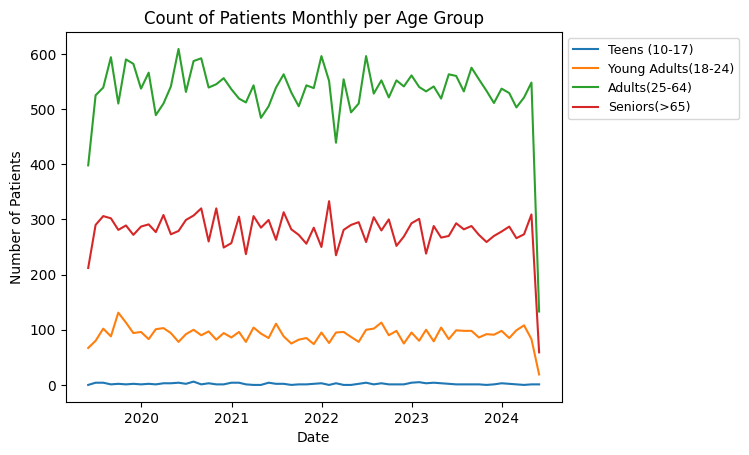

In [45]:
monthly_count_per_age_group= df.set_index('Date of Admission').resample('M')['Age Group'].value_counts().unstack(fill_value=0)

print(monthly_count_per_age_group)



plt.plot(monthly_count_per_age_group.index,  monthly_count_per_age_group['Teens(10-17)'], label='Teens (10-17)')
plt.plot(monthly_count_per_age_group.index,  monthly_count_per_age_group['Young Adults(18-24)'], label='Young Adults(18-24)')
plt.plot(monthly_count_per_age_group.index,  monthly_count_per_age_group['Adults(25-64)'], label='Adults(25-64)')
plt.plot(monthly_count_per_age_group.index,  monthly_count_per_age_group['Seniors(>65)'], label='Seniors(>65)')
plt.legend(fontsize=9, loc='upper left', bbox_to_anchor=(1,1))
plt.xlabel("Date")
plt.ylabel("Number of Patients")
plt.title("Count of Patients Monthly per Age Group")

plt.show()
